# DBSCAN
Author: Ryan Liao 
Date: 2022/01/22

In [32]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import random

UsageError: Line magic function `%` not found.


In [3]:
class scanner:
    def __init__(self,data,idx) -> None:
        self.data = data 
        self.idx = idx
        self.visited = set([idx])

    def find_all_neighbours(self,idx=None,eps = 0.5):
        X = self.data.copy()
        if idx is None:
            idx = self.idx
        #Direct Association
        DA = set(i for i in np.argwhere(np.linalg.norm(X - X[idx], axis = 1)  < eps).flatten() if i != idx) 
        # Base_Case
        if len(DA) == 0:#Only one self
            return [idx] 
        else:#Inductive step
            out = [idx]#set()
            new_friends =  DA.difference(self.visited)
            if len(new_friends) == 0:
                return [idx] 
            else:
                for i in new_friends:
                    if i not in self.visited:
                        self.visited.add(i)
                        out = out + (self.find_all_neighbours(i,eps))#out.union(find_all_neighbours(X,i,eps))
                    else:
                        pass 
            return out 

In [7]:
def dbSCAN(X, eps = 0.5,min_samples = 5):
    import random
    Num_Core = 0
    candidates = {i for i in range(X.shape[0])}
    Labs = {-1:[]}
    max_iter = 2 * len(candidates)
    count = 0
    while len(candidates) > 0:
        #Step 1:Randomly select a point to decide if it's an outlier or not
        selected_idx = random.choice(list(candidates)) 
        selected = X[selected_idx,:]
        #Step 2:Find all other points within the ball 
        DA = set(np.argwhere(np.linalg.norm(X - selected, axis = 1)  < eps).flatten())
        if len(DA) == 1: #Decide if is an outlier 
            Labs[-1].append(selected_idx)
            candidates.remove(selected_idx)
        elif len(DA) > min_samples: #If is Core 
            Scan = scanner(X,selected_idx)
            Cluster_idx= Scan.find_all_neighbours(eps = eps)
            Labs[Num_Core] = Cluster_idx
            candidates = candidates.difference(Cluster_idx)
            Num_Core += 1 
        count += 1 
        if count > max_iter:
            break
    Labs[-1] += list(candidates)
    return Labs 


In [22]:
def Get_Label(Lab_dict):
    n = sum([len(i) for i in Lab_dict.values()])
    my_LABS = [i for i in range(n)]
    for lab in Lab_dict:
        for idx in Lab_dict[lab]:
            my_LABS[idx] = lab 
    return my_LABS

# Play Groud

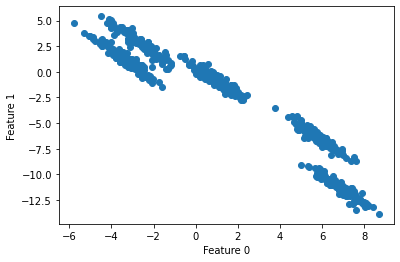

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [18]:
out = dbSCAN(X,eps = 0.5, min_samples = 15)
my_LABS = Get_Label(out)

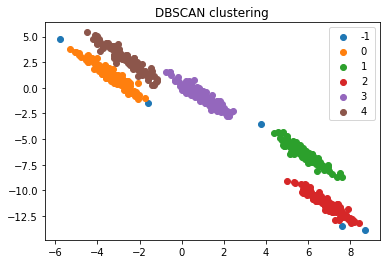

In [19]:
#Plot for DBSCAN
import pandas as pd
df = pd.DataFrame(X)
df['db_lab'] = my_LABS
db_labs = out.keys()
for lab in db_labs:
    _df = df.query(f'db_lab == {lab}')
    plt.scatter(_df[0],_df[1])
plt.legend(db_labs)
plt.title('DBSCAN clustering')
plt.show()

# Iris data

In [11]:
data_iris = pd.read_csv('Iris.csv')

{0, 1, -1}


Text(0, 0.5, 'PetalWidthCm')

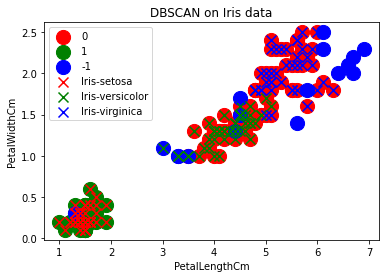

In [31]:
#from sklearn.cluster import DBSCAN
dataset_Iris = pd.read_csv('Iris.csv')
df_temp = dataset_Iris.drop(['Id','Species'],axis = 1)
#dbsc = DBSCAN(eps = 0.55, min_samples = 15).fit(df_temp)
labels = Get_Label(dbSCAN(np.array(df_temp)))

print(set(labels))
dataset_Iris['Lab'] = labels 

##Plotting
Feature1 = 'PetalLengthCm'
Feature2 = 'PetalWidthCm'
C = (c for c in ['r','g','b'])
for lab in set(labels):
    c = C.__next__()
    _df = dataset_Iris.query(f'Lab == {lab}')
    plt.scatter(_df[Feature1],_df[Feature2],s= 200,c = c)


C = (c for c in ['r','g','b'])
SPEs = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for spe in SPEs:
    #print(spe)
    c = C.__next__()
    _df = dataset_Iris[dataset_Iris['Species'] == spe]
    plt.scatter(_df[Feature1],_df[Feature2],s= 100,marker = 'x',c = c)

   
plt.title("DBSCAN on Iris data")
plt.xlabel(Feature1)
plt.ylabel(Feature2)
show()
#should return somethink like below but not necessarily the same, take as a reference